In [15]:
import requests
%matplotlib inline
import matplotlib.pyplot as plt
import json 
from PIL import Image
from io import BytesIO

In [16]:
#save subscription key and end_point as variables
my_cv_sub_key = "<KEY for azure##############>"
my_cv_end_point = "<Enter the end point for azure##################3>"

In [17]:
# build the rest of the uri
my_analyze_url = my_cv_end_point + "vision/v2.1/analyze"
my_analyze_url

'https://demo-computer-vision-api.cognitiveservices.azure.com/vision/v2.1/analyze'

In [18]:
#my_image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/Pont_des_Arts%2C_Paris.jpg/2560px-Pont_des_Arts%2C_Paris.jpg"
#my_image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/e6/Paris_Night.jpg/2560px-Paris_Night.jpg"
#my_image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Paris_vue_d%27ensemble_tour_Eiffel.jpg/1920px-Paris_vue_d%27ensemble_tour_Eiffel.jpg"
my_image_url = "https://discovery.sndimg.com/content/dam/images/discovery/fullset/2020/2/21/Getty%20Images.jpg.rend.hgtvcom.616.616.suffix/1582329409187.jpeg"

In [19]:
#configure the requests object - this is how we send the request to the api
headers = {'Ocp-Apim-Subscription-Key': my_cv_sub_key}
print(headers)
params = {'visualFeatures':'Categories,Description,Objects'}
print(params)
data = {'url': my_image_url}
print(data)
response = requests.post(my_analyze_url, headers=headers,params=params,json=data)
print(type(response))
response

{'Ocp-Apim-Subscription-Key': '97fbf3687c8a43639f1beb5fd19aede0'}
{'visualFeatures': 'Categories,Description,Objects'}
{'url': 'https://discovery.sndimg.com/content/dam/images/discovery/fullset/2020/2/21/Getty%20Images.jpg.rend.hgtvcom.616.616.suffix/1582329409187.jpeg'}
<class 'requests.models.Response'>


<Response [200]>

In [20]:
#store the results in the analysis object
analysis=response.json()
print(type(analysis))
print(analysis)

<type 'dict'>
{u'metadata': {u'width': 616, u'format': u'Jpeg', u'height': 616}, u'objects': [{u'confidence': 0.583, u'object': u'building', u'rectangle': {u'y': 42, u'x': 81, u'w': 450, u'h': 279}}], u'description': {u'captions': [{u'text': u'Taj Mahal leading to a building', u'confidence': 0.6361628692819967}], u'tags': [u'outdoor', u'grass', u'building', u'water', u'train', u'yellow', u'bench', u'track', u'bridge', u'park', u'sitting', u'sidewalk', u'river', u'large', u'walking', u'street', u'platform', u'white', u'city', u'umbrella', u'table', u'standing', u'rain', u'traveling', u'riding', u'clock', u'holding', u'traffic', u'tower', u'man', u'red', u'rainy', u'boat', u'people']}, u'categories': [{u'score': 0.26171875, u'name': u'building_', u'detail': {u'landmarks': [{u'confidence': 0.9999939203262329, u'name': u'Taj Mahal'}]}}, {u'score': 0.046875, u'name': u'outdoor_', u'detail': {u'landmarks': [{u'confidence': 0.9999939203262329, u'name': u'Taj Mahal'}]}}], u'requestId': u'74820

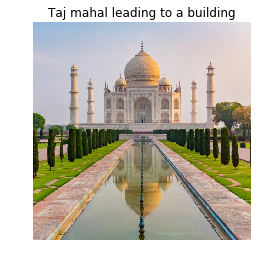

In [21]:
#Display the image with the caption
image = Image.open(BytesIO(requests.get(my_image_url).content))
plt.imshow(image)
plt.axis("off")
_ = plt.title(analysis["description"]["captions"][0]["text"].capitalize(), size="large")
plt.show()
